In [42]:

import numpy as np
import pandas as pd
import seaborn as sns
import random
import csv
from matplotlib import pyplot as plt
from pylab import rcParams
from matplotlib import rc
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8


In [43]:
from google.colab import files
uploaded = files.upload()

Saving real_estate.csv to real_estate (2).csv


In [44]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['real_estate.csv']))


In [45]:
df2

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [46]:
df2['X2 house age'].describe()

count    414.000000
mean      17.712560
std       11.392485
min        0.000000
25%        9.025000
50%       16.100000
75%       28.150000
max       43.800000
Name: X2 house age, dtype: float64

In [47]:
df2['X3 distance to the nearest MRT station'].describe()

count     414.000000
mean     1083.885689
std      1262.109595
min        23.382840
25%       289.324800
50%       492.231300
75%      1454.279000
max      6488.021000
Name: X3 distance to the nearest MRT station, dtype: float64

In [48]:
df2['X4 number of convenience stores'].describe()

count    414.000000
mean       4.094203
std        2.945562
min        0.000000
25%        1.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: X4 number of convenience stores, dtype: float64

In [30]:
df2['Y house price of unit area'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y house price of unit area, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


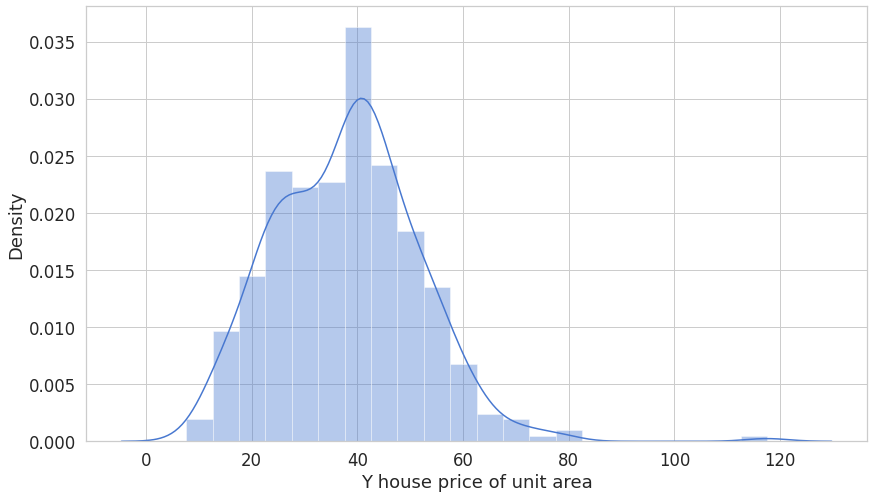

In [49]:
sns.distplot(df2['Y house price of unit area']);


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


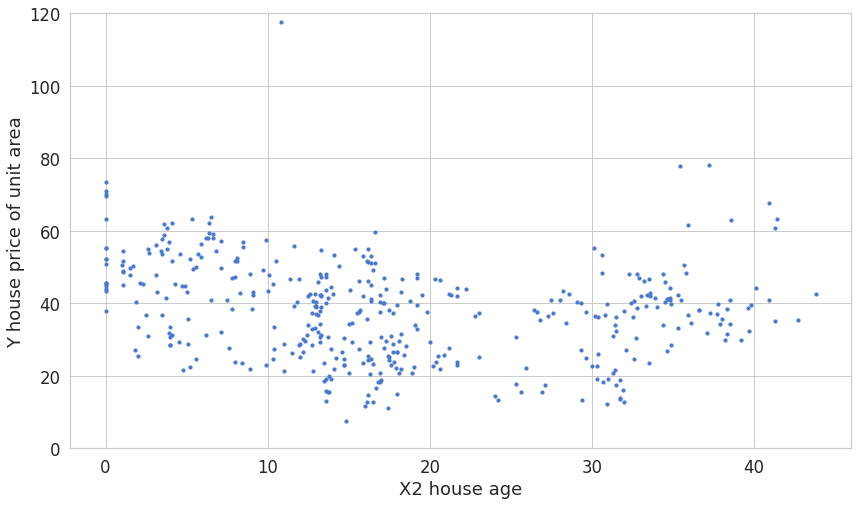

In [50]:
var2 = 'X2 house age'
data = pd.concat([df2['Y house price of unit area'], df2[var2]], axis=1)
data.plot.scatter(x=var2, y='Y house price of unit area', ylim=(0,120), s=10);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


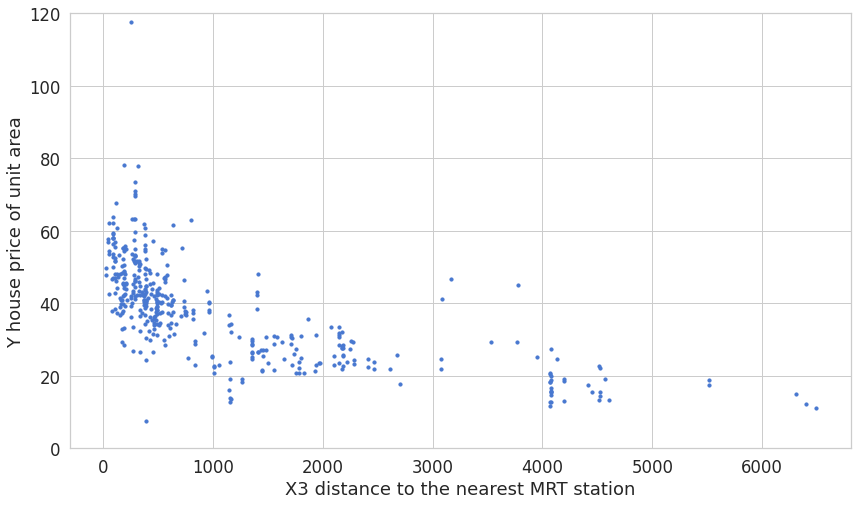

In [51]:
var3 = 'X3 distance to the nearest MRT station'
data = pd.concat([df2['Y house price of unit area'], df2[var3]], axis=1)
data.plot.scatter(x=var3, y='Y house price of unit area', ylim=(0,120), s=10);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


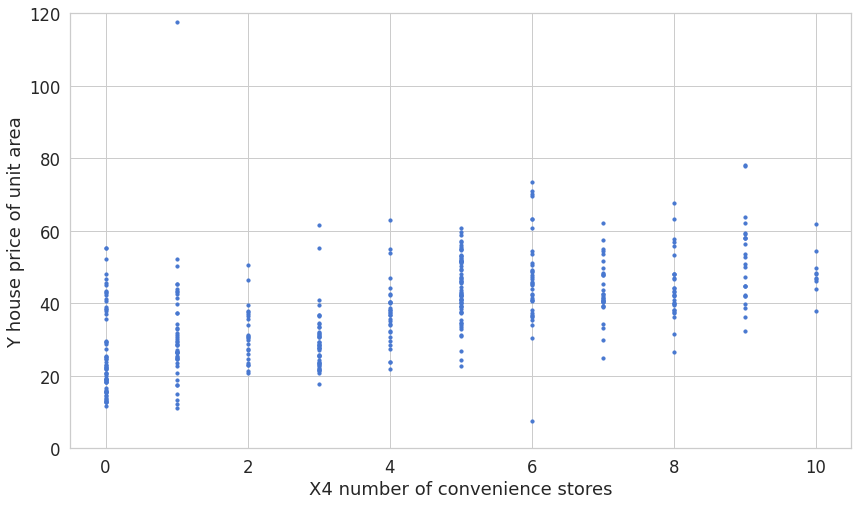

In [52]:
var4 = 'X4 number of convenience stores'
data = pd.concat([df2['Y house price of unit area'], df2[var4]], axis=1)
data.plot.scatter(x=var4, y='Y house price of unit area', ylim=(0,120), s=10);

In [53]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

In [54]:
def correlation(x, y):
    return np.mean(x*y)

In [55]:
x2_train, x2_test, y_train, y_test = train_test_split(df2[var2], df2['Y house price of unit area'], test_size=0.2, random_state=0)
std_unit_x2 = standard_units(x2_train)
std_unit_y = standard_units(y_train)
correlation(std_unit_x2,std_unit_y)

-0.22325526727376183

In [56]:
x3_train, x3_test, y_train, y_test = train_test_split(df2[var3], df2['Y house price of unit area'], test_size=0.2, random_state=0)
std_unit_x3 = standard_units(x3_train)
correlation(std_unit_x3,std_unit_y)

-0.6626590172836907

In [57]:
x4_train, x4_test, y_train, y_test = train_test_split(df2[var4], df2['Y house price of unit area'], test_size=0.2, random_state=0)
std_unit_x4 = standard_units(x4_train)
correlation(std_unit_x4,std_unit_y)

0.5618528964629658

In [58]:
def slope(x, y):
    r = correlation(x, y)
    return r * np.std(y) / np.std(x)

def intercept(x, y):
    return np.mean(x) - slope(x, y) * np.mean(y)

def linear_fit(x, y):
    a = slope(x, y)
    b = intercept(x, y)
    return a * x + b

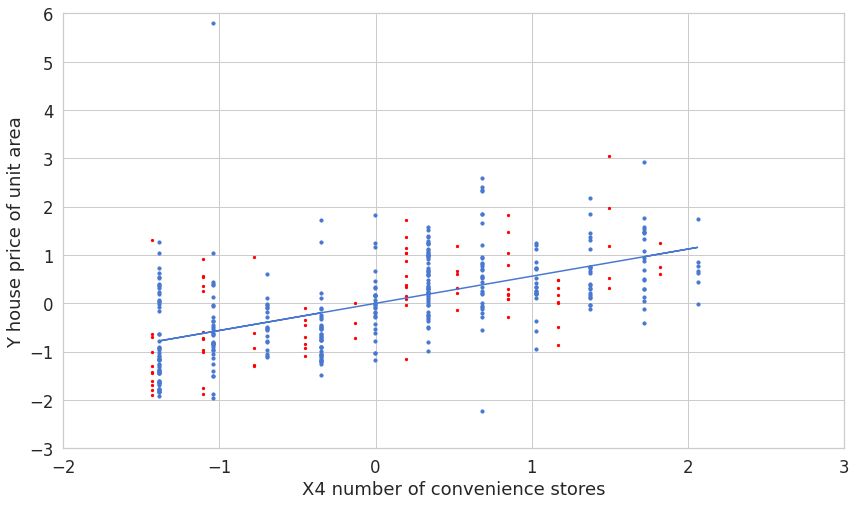

In [59]:
plt.xlabel(var4)
plt.ylabel('Y house price of unit area')
plt.scatter(std_unit_x4,std_unit_y, s=10)
su4t = standard_units(x4_test)
suyt = standard_units(y_test)
std_unit_x4_test = standard_units(x4_test)
std_unit_y_test = standard_units(y_test)
plt.scatter(std_unit_x4_test,std_unit_y_test, color = 'red', s=5)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
x = std_unit_x4
y = linear_fit(std_unit_x4,std_unit_y)
plt.plot(x,y)
plt.show()